<h1> Use of the Experiment class </h1>

In [1]:
#General imports
resol = 300
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "axes.linewidth": 0.7,
    "xtick.major.width": 0.6,
    "ytick.major.width": 0.6,
})

import sys
import numpy as np
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

#Local imports

from src.xp_config import ExperimentConfig
from src.experiment import Experiment
from src.rg_integrator import rg_propagator

<h2> Generate an initial configutation </h1>

The initial configuration is as follows:
- Monochromatic photonic wave packet $(\omega_p, \Delta_k, x_0)$
- Atom and cavity length $(\omega_0, \gamma, L)$
- Time evolution $(T, dt)$
- IR and UV cutoffs $(\Lambda_{\rm IR}, \Lambda_{\rm UV})$

In [4]:
param_photon = {'omega_p': 10*np.pi, 'delta_k': 0.05*np.pi, 'x_0': -25}  

param_cavity = {'omega_0': 10*np.pi, 'gamma': np.pi, 'L': 100}

param_time_evol = {'T': 50, 'dt': 0.01}

cutoffs = {'ir_cutoff': 0*np.pi, 'uv_cutoff': 20*np.pi}

<h2> Run an experiment </h2>

In [5]:
config = ExperimentConfig(param_photon, param_cavity, param_time_evol, cutoffs)
scattering_experiment = Experiment(config)
c_array, b_array = scattering_experiment.propagate_state(progress=True)

#Check eventual messages
messages = scattering_experiment.get_messages()

100%|██████████| 4999/4999 [00:00<00:00, 6775.33it/s]


<h2> Visualize excitation numbers </h2>

Get the observables and generate a time array for the figure

In [6]:
time_array = np.arange(0, param_time_evol['T'], param_time_evol['dt'])   
An_array, Tn_array, Rn_array = scattering_experiment.compute_observables()

messages = scattering_experiment.get_messages()

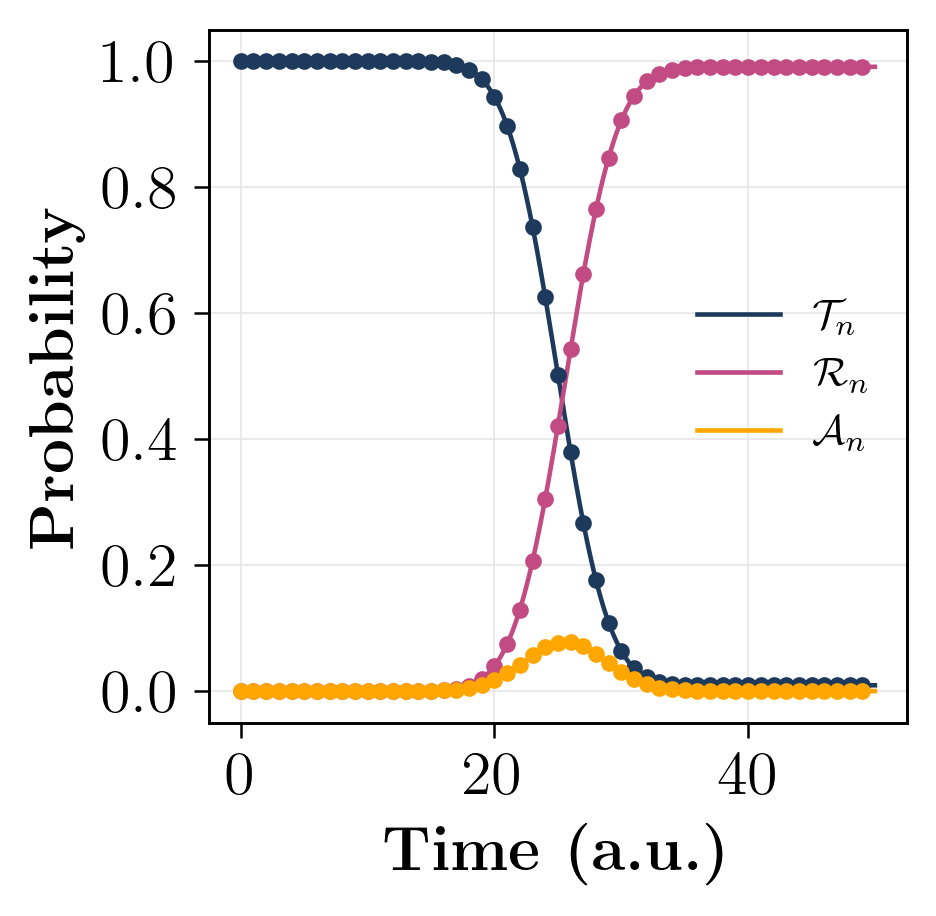

In [7]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)

step_marker = 100  
color_Tn = '#1d3a5c'     
color_Rn = '#c14b82'      
color_atom = '#ffa600'

# ---- courbes lisses ----
ax.plot(time_array, Tn_array , '-', color=color_Tn, lw=1.1, label=r'$\mathcal{T}_n$')
ax.plot(time_array, Rn_array, '-', color=color_Rn, lw=1.1, label=r'$\mathcal{R}_n$')
ax.plot(time_array, An_array, '-', color=color_atom, lw=1.1, label=r'$\mathcal{A}_n$')

# ---- marqueurs discrets tous les N points ----
ax.plot(time_array[::step_marker], Tn_array[::step_marker], 'o', ms=3, color=color_Tn)
ax.plot(time_array[::step_marker], Rn_array[::step_marker], 'o', ms=3, color=color_Rn)
ax.plot(time_array[::step_marker], An_array[::step_marker], 'o', ms=3, color=color_atom)

# Labels, limites et grille
ax.set_xlabel(r'\textbf{Time (a.u.)}', fontsize=10)
ax.set_ylabel(r'\textbf{Probability}', fontsize=10)
#ax.set_xticks(np.array([0, 10, 20, 30, 40, 50]))
#ax.set_ylim(-0.05, 1.05)
ax.grid(color='0.9', linestyle='-', linewidth=0.4)

# Légende sobre
ax.legend(prop={'size': 10}, loc="center right", frameon=False)

#font size
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(15)

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

#plt.savefig("./fig/single_photon_example_1.25omega0.pdf", bbox_inches="tight")
plt.show()